<a href="https://colab.research.google.com/github/EcoGreenPath-C23-PM02/MachineLearning/blob/main/TrialCBF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
dataset = pd.read_csv("dataset_coba2.csv", sep=';', index_col='id')
dataset.head()

,travel_preference,transportation_preference,physical_activity_level,activity_preferences,activity_description,tour_preferences,tour_description,budget_range,trip_duration
id,,,,,,,,,
0,Group tour,Biking,Challenging,Village Tour Cycling,Biking is the activity of cycling on various t...,3D/2N Authentic Rural Experience at Tegal duku...,Tour packages that offer an authentic rural ex...,Rp 500.000 - Rp 1.000.000,2 or 3 Days
1,Group tour,Walking,Easy,Rice Field Trekking,Trekking is an activity of walking in nature t...,Treasure Hunt & Cooking Battle,Treasure Hunt & Cooking Battle adalah paket tu...,Rp 250.000 - Rp 500.000,1 Day
2,Solo,Biking,Medium,Village Tour Cycling,Biking is the activity of cycling on various t...,Treasure Hunt & Cooking Battle,Treasure Hunt & Cooking Battle adalah paket tu...,Rp 250.000 - Rp 500.000,1 Day
3,Solo,Car rental,Easy,Fireflies Watching,Activities that involve observing and witnessi...,Hiking Journey In Taro Village,Hiking trips in Taro Village that offer advent...,Rp 500.000 - Rp 1.000.000,1 Day
4,Group tour,Biking,Medium,Cooking Class,The highlight of the experience is travel back...,Treasure Hunt & Cooking Battle,Treasure Hunt & Cooking Battle adalah paket tu...,Rp 250.000 - Rp 500.000,1 Day


In [ ]:
print(dataset.index)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='id')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   travel_preference          7 non-null      object
 1   transportation_preference  7 non-null      object
 2   physical_activity_level    7 non-null      object
 3   activity_preferences       7 non-null      object
 4   activity_description       7 non-null      object
 5   tour_preferences           7 non-null      object
 6   tour_description           7 non-null      object
 7   budget_range               7 non-null      object
 8   trip_duration              7 non-null      object
dtypes: object(9)
memory usage: 560.0+ bytes


In [ ]:
dataset.describe()

,travel_preference,transportation_preference,physical_activity_level,activity_preferences,activity_description,tour_preferences,tour_description,budget_range,trip_duration
count,7,7,7,7,7,7,7,7,7
unique,2,3,3,6,6,3,3,2,2
top,Group tour,Biking,Challenging,Village Tour Cycling,Biking is the activity of cycling on various t...,Treasure Hunt & Cooking Battle,Treasure Hunt & Cooking Battle adalah paket tu...,Rp 250.000 - Rp 500.000,1 Day
freq,4,3,3,2,2,3,3,4,5


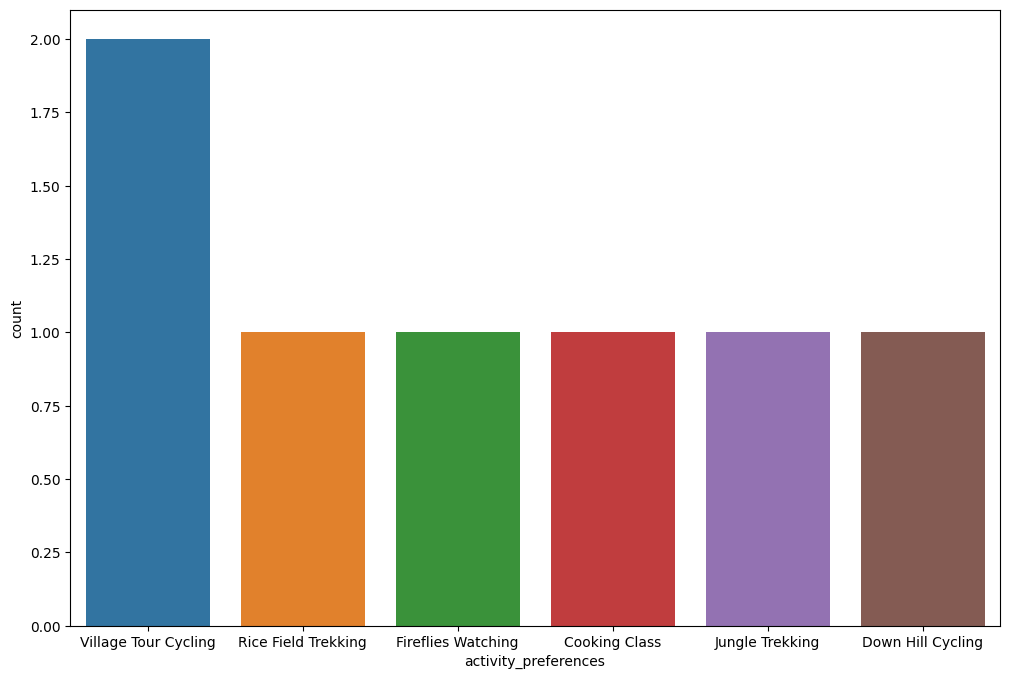

In [ ]:
# Visualizing with the activity_preferences column
activity_cat=dataset['activity_preferences'].value_counts()

dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=dataset.activity_preferences)

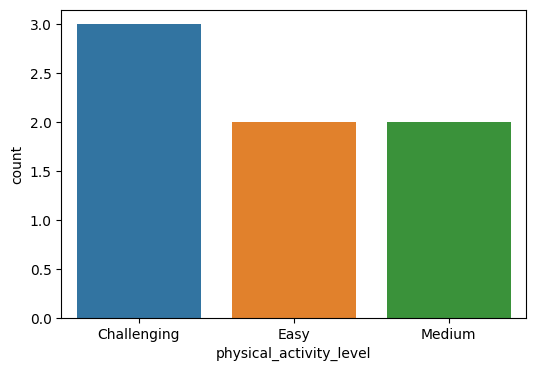

In [ ]:
# Visualizing with the physical_activity_level column
activity_cat=dataset['physical_activity_level'].value_counts()

dims = (6, 4)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=dataset.physical_activity_level)

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.shape

(7, 9)

In [ ]:
dataset["activity_description"].head()

id
0    Biking is the activity of cycling on various t...
1    Trekking is an activity of walking in nature t...
2    Biking is the activity of cycling on various t...
3    Activities that involve observing and witnessi...
4    The highlight of the experience is travel back...
Name: activity_description, dtype: object

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
dataset['activity_description']=dataset['activity_description'].fillna('')

tfidf_matrix = tfidf.fit_transform(dataset['activity_description'])
tfidf_matrix.shape

(7, 81)

In [ ]:
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
the_indices = pd.Series(dataset.index.values, index=dataset['activity_preferences']).drop_duplicates()

In [ ]:
import operator

In [ ]:
def get_the_recommendations(activity_preferences, cos_sim=cos_sim):
  indices = the_indices.get(activity_preferences)
  if indices is None or (isinstance(indices, np.ndarray) and len(indices) == 0):
    return pd.Series([])  # Return an empty Series if activity_preferences is not found or indices is empty

  index = indices[0] if isinstance(indices, np.ndarray) else indices.iloc[0] if isinstance(indices, pd.Series) else indices
  sim_scores = list(enumerate(cos_sim[index]))
  sim_scores = sorted(sim_scores, key=operator.itemgetter(1), reverse=True)
  sim_scores = sim_scores[:5]
  
  recommended_indices = set()
  technical_indices = []
  
  for i in sim_scores:
    if len(technical_indices) >= 5:
      break
      
    if i[1] > 0:  # Filter out activities with zero similarity score
        if i[0] not in recommended_indices:
          technical_indices.append(i[0])
          recommended_indices.add(i[0])

  recommendations = dataset.iloc[technical_indices]['activity_preferences']
  recommendations = recommendations.drop_duplicates()
  return recommendations


In [ ]:
# Try the recommendations
get_the_recommendations('Rice Field Trekking')

id
1     Rice Field Trekking
0    Village Tour Cycling
5         Jungle Trekking
3      Fireflies Watching
Name: activity_preferences, dtype: object